# Dataset IRIS

O conjunto de dados Iris ou conjunto de dados Iris de Fisher é um conjunto de dados multivariados introduzido pelo estatístico e biólogo britânico Ronald Fisher em seu artigo de 1936, *O uso de múltiplas medições em problemas taxonômicos*, como um exemplo de análise discriminante linear. Às vezes, é chamado de conjunto de dados da Íris de Anderson porque Edgar Anderson coletou os dados para quantificar a variação morfológica das flores da Íris de três espécies relacionadas. Duas das três espécies foram coletadas na Península de Gaspé, "todas do mesmo campo, colhidas no mesmo dia e medidas ao mesmo tempo pela mesma pessoa com o mesmo aparelho".

O conjunto de dados consiste em 50 amostras de cada uma das três espécies de Iris (Iris Setosa, Iris Virginica e Iris Versicolor). Quatro variáveis foram medidas em cada amostra: o comprimento e a largura das sépalas e pétalas, em centímetros. Com base na combinação dessas quatro características, Fisher desenvolveu um modelo discriminante linear para distinguir as espécies umas das outras.

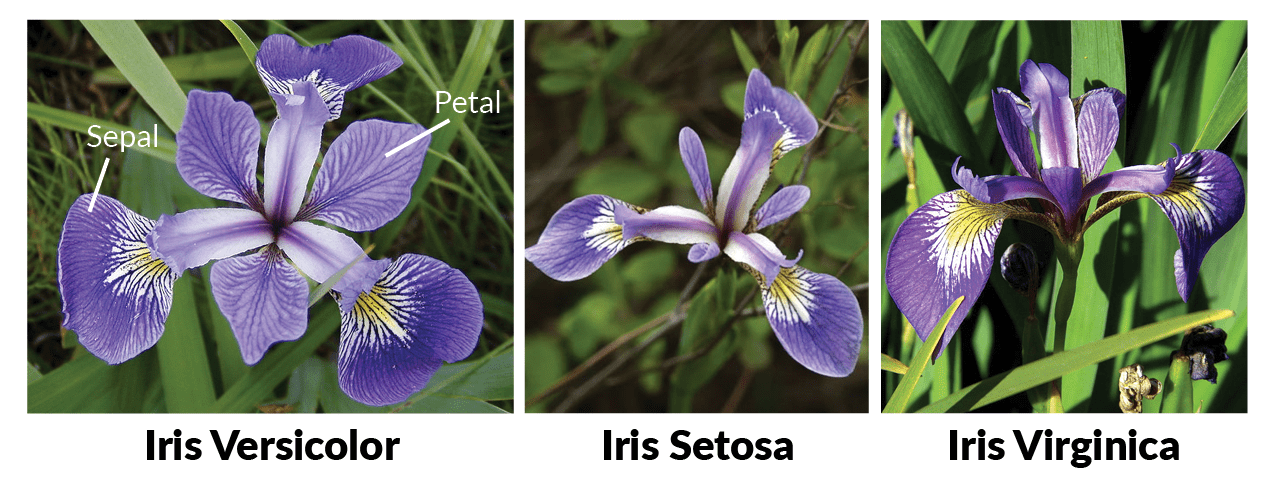

In [1]:
#Importação das bibliotecas
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Carrega o data set Iris
iris = datasets.load_iris()
#Transforma o dataset em um dataframe para melhor visualização em gráfico
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [3]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


Carregado o dataset,  vamos dar uma olhada em alguns detalhes do mesmo. Para ver um resumo estatístico utilizaremos o describe().T. O ".T" é para fazer a transposta do dataset (transformar linhas em colunas e vice versa).

In [4]:
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
label,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


O resultado mostra algumas medidas estatísticas como a contagem total, as médias, os desvios-padrão, os quartis, além dos valores mínimo e máximo das observações.

Observe que na coluna count, o resultado foi unanimamente 150. Isso pode indicar que não há **missing values (1)** ou há quantidade de linhas iguais com missing values. Podemos verificar isso da seguinte maneira.

Isso pode ser verificado utilizando o a função *shape*.

---
*(1) Dados corrompidos, falha ao carregar as informações ou extração incompleta podem gerar no mundo real valores faltando, do inglês missing values*

In [5]:
iris_df.shape

(150, 6)

Existem 150 linhas e 6 colunas. O count está correto e não há **missing values**. Mas para ter mais certeza, verificamos de outra maneira.

In [6]:
iris_df.isna().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
label                False
species              False
dtype: bool

Portanto não há valores perdidos em qualquer parte do dataset.

# Visualização gráfica

Vamos utilizar o gráfico scatterplot (gráfico de dispersão) para a plotagem do dataset.

Para isso, utilizaremos o pacote seaborn para plotagem do gráfico e o matplotlib para definir tamanho da figura, título e nomes dos eixo x e y.

Os gráficos abaixo mostram as relações das medidas de largura e comprimento de pétalas e sépalas de cada espécie (vide legenda).

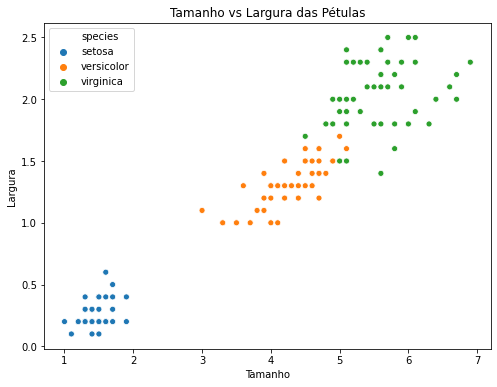

In [7]:
#Gráfico de dispersão
plt.figure(figsize=(8,6))
sns.scatterplot(data = iris_df, x = 'petal length (cm)', y = 'petal width (cm)', hue = 'species')
plt.title('Tamanho vs Largura das Pétulas')
plt.xlabel('Tamanho')
plt.ylabel('Largura')
plt.show()

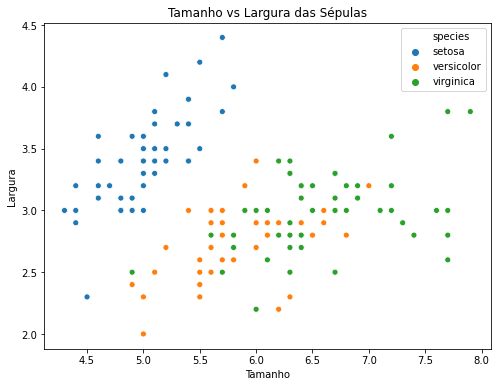

In [8]:
#Gráfico de dispersão
plt.figure(figsize=(8,6))
sns.scatterplot(data = iris_df, x = 'sepal length (cm)', y = 'sepal width (cm)', hue = 'species')
plt.title('Tamanho vs Largura das Sépulas')
plt.xlabel('Tamanho')
plt.ylabel('Largura')
plt.show()

Já o gráfico pairplot() mostra todas as relações em pares e as distribuições marginais.

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
D:\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


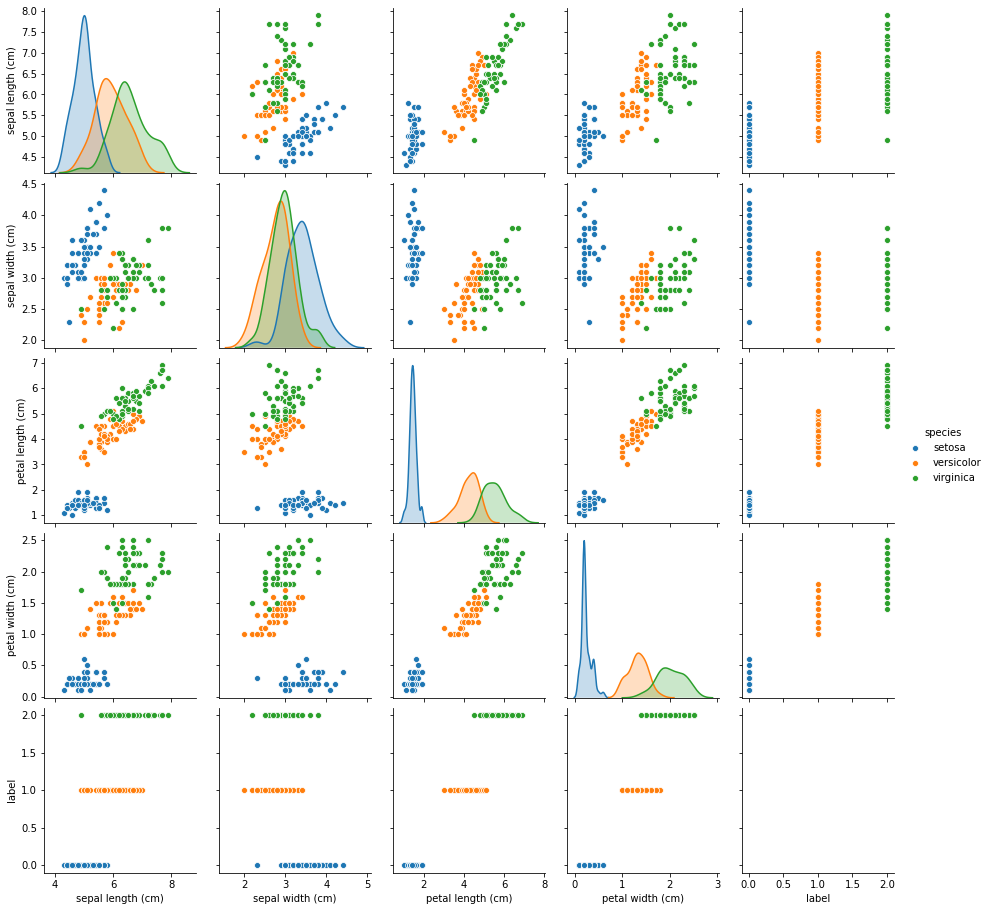

In [9]:
sns.pairplot(iris_df, hue = 'species')

# Modelo Preditivo

Para classificar as espécies descobertas, será utilizado quatro modelos de machine learning, efetuando comparações dos resultados de cada um e ana.isando qual obteve a melhor predição.

Importaremos agora os quatro modelos (SVM, Regressão Logística, KNN e Decision Tree). Além disso importaremos pacotes de métricas e divisão de treino e teste.

In [10]:
#Divisão de treino-teste
from sklearn.model_selection import train_test_split

#Modelos a serem comparados
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

#Métricas de performance e comparação
from sklearn import metrics

In [11]:
#Separar as variáveis target e predictors para fins de teste e treino.
predictors = iris_df.iloc[:,:-1]
target = iris_df['label']

In [12]:
#Dividimos o dataset em 30% para teste e 70% para treino
#A função train_test_split() divide arrays ou matrizes em subconjuntos aleatórios de treino e teste.
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3)

# Modelo 1: SVM | Support Vector Machine

In [13]:
svm_model = svm.SVC(kernel = 'linear', C=1)
svm_fit = svm_model.fit(X_train, y_train)
svm_prediction = svm_fit.predict(X_test)

svm_metric = metrics.accuracy_score(svm_prediction, y_test)
print("Acurácia:", svm_metric)

Acurácia: 1.0


### Matriz de confusão

In [14]:
#Os valores originais são apresentados nos índices e os valores preditos nas colunas
pd.DataFrame(metrics.confusion_matrix(y_test, svm_prediction, labels=[0,1,2]),
             columns=['setosa_predicted', 'versicolor_predicted', 'virginica_predicted'],
             index=['setosa_original', 'versicolor_original', 'virginica_original'])

,setosa_predicted,versicolor_predicted,virginica_predicted
setosa_original,14,0,0
versicolor_original,0,17,0
virginica_original,0,0,14


# Modelo 2: Regressão Logística | Logistic Regression

In [15]:
lr_model = LogisticRegression()
lr_fit = lr_model.fit(X_train, y_train)
lr_prediction = lr_fit.predict(X_test)

lr_metric = metrics.accuracy_score(lr_prediction, y_test)
print("Acurácia:", lr_metric)

Acurácia: 1.0


### Matriz de confusão

In [16]:
#Os valores originais são apresentados nos índices e os valores preditos nas colunas
pd.DataFrame(metrics.confusion_matrix(y_test, lr_prediction, labels=[0,1,2]),
             columns=['setosa_predicted', 'versicolor_predicted', 'virginica_predicted'],
             index=['setosa_original', 'versicolor_original', 'virginica_original'])

,setosa_predicted,versicolor_predicted,virginica_predicted
setosa_original,14,0,0
versicolor_original,0,17,0
virginica_original,0,0,14


# Modelo 3: Árvore de Decisão | Decision Tree

In [17]:
dt_model = DecisionTreeClassifier()
dt_fit = dt_model.fit(X_train, y_train)
dt_prediction = dt_fit.predict(X_test)

dt_metric = metrics.accuracy_score(dt_prediction, y_test)
print("Acurácia:", dt_metric)

Acurácia: 1.0


### Matriz de confusão

In [18]:
#Os valores originais são apresentados nos índices e os valores preditos nas colunas
pd.DataFrame(metrics.confusion_matrix(y_test, dt_prediction, labels=[0,1,2]),
             columns=['setosa_predicted', 'versicolor_predicted', 'virginica_predicted'],
             index=['setosa_original', 'versicolor_original', 'virginica_original'])

,setosa_predicted,versicolor_predicted,virginica_predicted
setosa_original,14,0,0
versicolor_original,0,17,0
virginica_original,0,0,14


# MODELO 4: KNN | K-Nearst Neighbor

In [19]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_fit = knn_model.fit(X_train, y_train)
knn_prediction = knn_fit.predict(X_test)

knn_metric = metrics.accuracy_score(knn_prediction, y_test)
print("Acurácia:", dt_metric)

Acurácia: 1.0


### Matriz de confusão

In [20]:
#Os valores originais são apresentados nos índices e os valores preditos nas colunas
pd.DataFrame(metrics.confusion_matrix(y_test, knn_prediction, labels=[0,1,2]),
             columns=['setosa_predicted', 'versicolor_predicted', 'virginica_predicted'],
             index=['setosa_original', 'versicolor_original', 'virginica_original'])

,setosa_predicted,versicolor_predicted,virginica_predicted
setosa_original,14,0,0
versicolor_original,0,17,0
virginica_original,0,0,14
